In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score


In [3]:

# Read the dataset
kpop_top1000_tracks = pd.read_csv("kpop_top1000_tracks.csv")

# Drop unnecessary columns (e.g., song_name, album_name, etc.)
kpop_top1000_tracks = kpop_top1000_tracks.drop(['song_name', 'album_name', 'album_link', 'artist_name', 'song_link'], axis=1)

# Convert categorical data to numerical using label encoding (explicit column)
label_encoder = LabelEncoder()
kpop_top1000_tracks['explicit'] = label_encoder.fit_transform(kpop_top1000_tracks['explicit'])

# Convert the 'release_date' column to a datetime object for further processing
kpop_top1000_tracks['release_date'] = pd.to_datetime(kpop_top1000_tracks['release_date'], errors='coerce')

# Drop rows with invalid dates (NaT)
kpop_top1000_tracks = kpop_top1000_tracks.dropna(subset=['release_date'])

# Extract the year, month, and day of the week from the 'release_date' column
kpop_top1000_tracks['release_year'] = kpop_top1000_tracks['release_date'].dt.year
kpop_top1000_tracks['release_month'] = kpop_top1000_tracks['release_date'].dt.month
kpop_top1000_tracks['release_dayofweek'] = kpop_top1000_tracks['release_date'].dt.dayofweek

# Drop the original 'release_date' column
kpop_top1000_tracks = kpop_top1000_tracks.drop('release_date', axis=1)

# Split the data into features (X) and target (y) for supervised learning
features = ['duration_ms', 'explicit', 'release_year', 'release_month', 'release_dayofweek']
target = 'popularity'
X_supervised = kpop_top1000_tracks[features]
y_supervised = kpop_top1000_tracks[target]

# Split the data into training and testing sets for supervised learning
X_train_supervised, X_test_supervised, y_train_supervised, y_test_supervised = train_test_split(X_supervised, y_supervised, test_size=0.2, random_state=42)

# Standardize the numerical features for supervised learning
scaler_supervised = StandardScaler()
X_train_scaled_supervised = scaler_supervised.fit_transform(X_train_supervised)
X_test_scaled_supervised = scaler_supervised.transform(X_test_supervised)



In [4]:
# Train a RandomForestClassifier for supervised learning
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled_supervised, y_train_supervised)

# Make predictions on the test set for supervised learning
y_pred_supervised = rf_classifier.predict(X_test_scaled_supervised)

# Calculate accuracy for supervised learning
accuracy_supervised = accuracy_score(y_test_supervised, y_pred_supervised)
classification_rep_supervised = classification_report(y_test_supervised, y_pred_supervised)


c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

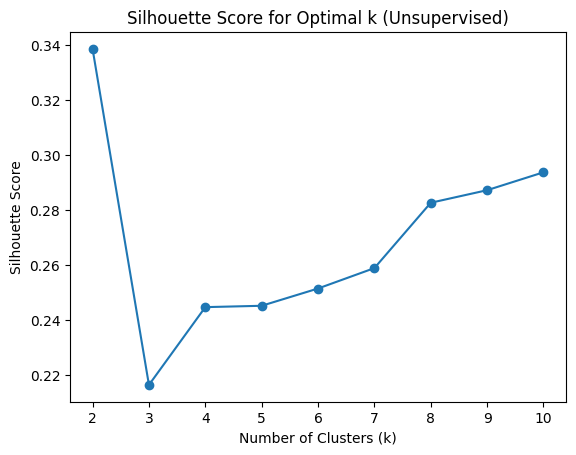

Supervised Learning (Random Forest) Results:
Accuracy: 0.135

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.94      0.74        17
           1       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
          60       0.00      0.00      0.00         1
          61       0.33      0.15      0.21        20
          62       0.10      0.12      0.11        17
          63       0.05      0.08      0.06        12
          64       0.09      0.15      0.11        13
          65       0.14      0.20      0.17        10
          66       0.00      0.00      0.00        13
          67       0.11      0.14      0.12         7
          68       0.00      0.00      0.00        10
          69       0.00      0.00      0.00       

In [5]:

# Standardize the numerical features for unsupervised learning
scaler_unsupervised = StandardScaler()
X_unsupervised = scaler_unsupervised.fit_transform(kpop_top1000_tracks)

# Determine the optimal number of clusters using the Silhouette Score
silhouette_scores = []
k_values = range(2, 11)  # Try different values of k from 2 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_unsupervised)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_unsupervised, labels))

# Plot the Silhouette Scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (Unsupervised)')
plt.show()

print("Supervised Learning (Random Forest) Results:")
print("Accuracy:", accuracy_supervised)
print("\nClassification Report:")
print(classification_rep_supervised)



In [6]:
# Determine the best algorithm based on accuracy
if accuracy_supervised > max(silhouette_scores):
    print("\nThe Supervised Algorithm (Random Forest) is better based on accuracy.")
else:
    print("\nThe Unsupervised Algorithm (K-means) is better based on accuracy.")



The Unsupervised Algorithm (K-means) is better based on accuracy.
